## Project 3 - Wildfires

A wildfire is an uncontrolled fire that burns in the wildland vegetation, including rural areas, shrublands/grasslands, savannas, croplands, etc. We will be using datasets that will help us identify how much area is burnt every week per country, the total land area burnt per year, as well as the type of land (ecosystem) burnt per year. The data we will be using were taken from the years 2012-2022.


In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr
import requests
import time
from pathlib import Path
import folium
from ipywidgets import interact, Dropdown, Output
from geopy.geocoders import Nominatim

## Cumulative Area Burnt Weekly

In [2]:
# Create a path to CSV files, read the path and print DataFrame for the first CSV file
file_path = (r"C:\Users\alexi\Desktop\Project3Group3\Resources\1- cumulative-area-burnt-by-wildfires-by-week.csv")
wildfires = pd.read_csv(file_path)
wildfires

,Entity,Code,Year,Cumulative area burnt by wildfires in 2024,Cumulative area burnt by wildfires in 2023,Cumulative area burnt by wildfires in 2022,Cumulative area burnt by wildfires in 2021,Cumulative area burnt by wildfires in 2020,Cumulative area burnt by wildfires in 2019,Cumulative area burnt by wildfires in 2018,Cumulative area burnt by wildfires in 2017,Cumulative area burnt by wildfires in 2016,Cumulative area burnt by wildfires in 2015,Cumulative area burnt by wildfires in 2014,Cumulative area burnt by wildfires in 2013,Cumulative area burnt by wildfires in 2012
0,Afghanistan,AFG,1,391.0,0,0,1246,0,0,117,0,0,368,0,0,0
1,Afghanistan,AFG,2,559.0,0,0,2680,963,20,117,82,0,425,426,0,0
2,Afghanistan,AFG,3,841.0,0,0,3539,1181,20,264,129,390,425,426,54,0
3,Afghanistan,AFG,4,841.0,0,0,3719,2030,20,411,129,390,425,426,362,368
4,Afghanistan,AFG,5,841.0,0,215,4131,3351,20,411,129,1043,425,426,379,597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,Zimbabwe,ZWE,48,NaN,2358715,3017486,2090438,1221386,2752906,2705357,2437024,2176472,3182494,2831917,2556610,3266499
13412,Zimbabwe,ZWE,49,NaN,2383435,3017486,2108381,1221386,2753700,2705357,2441223,2178815,3192311,2861358,2562822,3269141
13413,Zimbabwe,ZWE,50,NaN,2385610,3017694,2113226,1221386,2754152,2707267,2443004,2179147,3194733,2862483,2564134,3270515
13414,Zimbabwe,ZWE,51,NaN,2385610,3017694,2113226,1221548,2756253,2709955,2443661,2179147,3195377,2862758,2564322,3271228


In [3]:
#Drop unneeded columns
wildfires_clean = wildfires.drop(columns=['Cumulative area burnt by wildfires in 2024', 'Cumulative area burnt by wildfires in 2023'])
wildfires_clean

,Entity,Code,Year,Cumulative area burnt by wildfires in 2022,Cumulative area burnt by wildfires in 2021,Cumulative area burnt by wildfires in 2020,Cumulative area burnt by wildfires in 2019,Cumulative area burnt by wildfires in 2018,Cumulative area burnt by wildfires in 2017,Cumulative area burnt by wildfires in 2016,Cumulative area burnt by wildfires in 2015,Cumulative area burnt by wildfires in 2014,Cumulative area burnt by wildfires in 2013,Cumulative area burnt by wildfires in 2012
0,Afghanistan,AFG,1,0,1246,0,0,117,0,0,368,0,0,0
1,Afghanistan,AFG,2,0,2680,963,20,117,82,0,425,426,0,0
2,Afghanistan,AFG,3,0,3539,1181,20,264,129,390,425,426,54,0
3,Afghanistan,AFG,4,0,3719,2030,20,411,129,390,425,426,362,368
4,Afghanistan,AFG,5,215,4131,3351,20,411,129,1043,425,426,379,597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,Zimbabwe,ZWE,48,3017486,2090438,1221386,2752906,2705357,2437024,2176472,3182494,2831917,2556610,3266499
13412,Zimbabwe,ZWE,49,3017486,2108381,1221386,2753700,2705357,2441223,2178815,3192311,2861358,2562822,3269141
13413,Zimbabwe,ZWE,50,3017694,2113226,1221386,2754152,2707267,2443004,2179147,3194733,2862483,2564134,3270515
13414,Zimbabwe,ZWE,51,3017694,2113226,1221548,2756253,2709955,2443661,2179147,3195377,2862758,2564322,3271228


In [4]:
# Rename columns 
area_burnt_weekly = wildfires_clean.rename(columns={"Entity":"Country", "Year":"Week", "Cumulative area burnt by wildfires in 2022":"area_burnt_2022",
                                                   "Cumulative area burnt by wildfires in 2021":"area_burnt_2021", "Cumulative area burnt by wildfires in 2020":
                                                   "area_burnt_2020","Cumulative area burnt by wildfires in 2019":"area_burnt_2019", "Cumulative area burnt by wildfires in 2018":"area_burnt_2018",
                                                   "Cumulative area burnt by wildfires in 2017":"area_burnt_2017","Cumulative area burnt by wildfires in 2016":
                                                   "area_burnt_2016","Cumulative area burnt by wildfires in 2015":"area_burnt_2015",
                                                   "Cumulative area burnt by wildfires in 2014":"area_burnt_2014","Cumulative area burnt by wildfires in 2013":
                                                   "area_burnt_2013","Cumulative area burnt by wildfires in 2012":"area_burnt_2012"})
area_burnt_weekly

,Country,Code,Week,area_burnt_2022,area_burnt_2021,area_burnt_2020,area_burnt_2019,area_burnt_2018,area_burnt_2017,area_burnt_2016,area_burnt_2015,area_burnt_2014,area_burnt_2013,area_burnt_2012
0,Afghanistan,AFG,1,0,1246,0,0,117,0,0,368,0,0,0
1,Afghanistan,AFG,2,0,2680,963,20,117,82,0,425,426,0,0
2,Afghanistan,AFG,3,0,3539,1181,20,264,129,390,425,426,54,0
3,Afghanistan,AFG,4,0,3719,2030,20,411,129,390,425,426,362,368
4,Afghanistan,AFG,5,215,4131,3351,20,411,129,1043,425,426,379,597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,Zimbabwe,ZWE,48,3017486,2090438,1221386,2752906,2705357,2437024,2176472,3182494,2831917,2556610,3266499
13412,Zimbabwe,ZWE,49,3017486,2108381,1221386,2753700,2705357,2441223,2178815,3192311,2861358,2562822,3269141
13413,Zimbabwe,ZWE,50,3017694,2113226,1221386,2754152,2707267,2443004,2179147,3194733,2862483,2564134,3270515
13414,Zimbabwe,ZWE,51,3017694,2113226,1221548,2756253,2709955,2443661,2179147,3195377,2862758,2564322,3271228


In [5]:
area_burnt_weekly2 = area_burnt_weekly[["Country", "Week", "area_burnt_2022","area_burnt_2021","area_burnt_2020","area_burnt_2019","area_burnt_2018",
                                       "area_burnt_2017","area_burnt_2016","area_burnt_2015","area_burnt_2014","area_burnt_2013","area_burnt_2012"]].copy()
area_burnt_weekly2.astype(str)
area_burnt_weekly2.set_index("Country",inplace=True)
area_burnt_weekly2

,Week,area_burnt_2022,area_burnt_2021,area_burnt_2020,area_burnt_2019,area_burnt_2018,area_burnt_2017,area_burnt_2016,area_burnt_2015,area_burnt_2014,area_burnt_2013,area_burnt_2012
Country,,,,,,,,,,,,
Afghanistan,1,0,1246,0,0,117,0,0,368,0,0,0
Afghanistan,2,0,2680,963,20,117,82,0,425,426,0,0
Afghanistan,3,0,3539,1181,20,264,129,390,425,426,54,0
Afghanistan,4,0,3719,2030,20,411,129,390,425,426,362,368
Afghanistan,5,215,4131,3351,20,411,129,1043,425,426,379,597
...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,48,3017486,2090438,1221386,2752906,2705357,2437024,2176472,3182494,2831917,2556610,3266499
Zimbabwe,49,3017486,2108381,1221386,2753700,2705357,2441223,2178815,3192311,2861358,2562822,3269141
Zimbabwe,50,3017694,2113226,1221386,2754152,2707267,2443004,2179147,3194733,2862483,2564134,3270515


In [6]:
world_sector_bar = area_burnt_weekly2.loc['World']
world_sector_bar.head(10)

,Week,area_burnt_2022,area_burnt_2021,area_burnt_2020,area_burnt_2019,area_burnt_2018,area_burnt_2017,area_burnt_2016,area_burnt_2015,area_burnt_2014,area_burnt_2013,area_burnt_2012
Country,,,,,,,,,,,,
World,1,6823054,6243280,8420206,9185009,8567571,9048469,9403529,11393788,9838285,9556322,867121
World,2,13529661,13612986,19669008,17072796,17328420,16264442,17856200,21682968,18297760,19060834,1616295
World,3,21414932,22073170,28404578,24038128,24573232,22874132,25445644,28971462,26152724,26736024,5366893
World,4,30536682,28618532,37736476,30544302,31499508,28860450,36577550,36367916,32038790,33213814,13476441
World,5,37957364,36223096,44947824,35374956,34297624,35594292,46125896,44216268,38664290,41621344,20367056
World,6,44874256,42458070,54342136,42909572,34745360,42455560,54785850,49315480,45378496,47975000,26860696
World,7,50662508,47555252,61771468,49307644,35037444,48022684,61176708,54355060,52410424,52651900,31831508
World,8,56108440,53917932,68793820,55899440,35241732,54097160,66080910,58971150,57742480,59391244,37821692
World,9,61437780,62679790,75113890,62130304,35577944,59451504,70577750,65211230,62588764,64882296,43500268


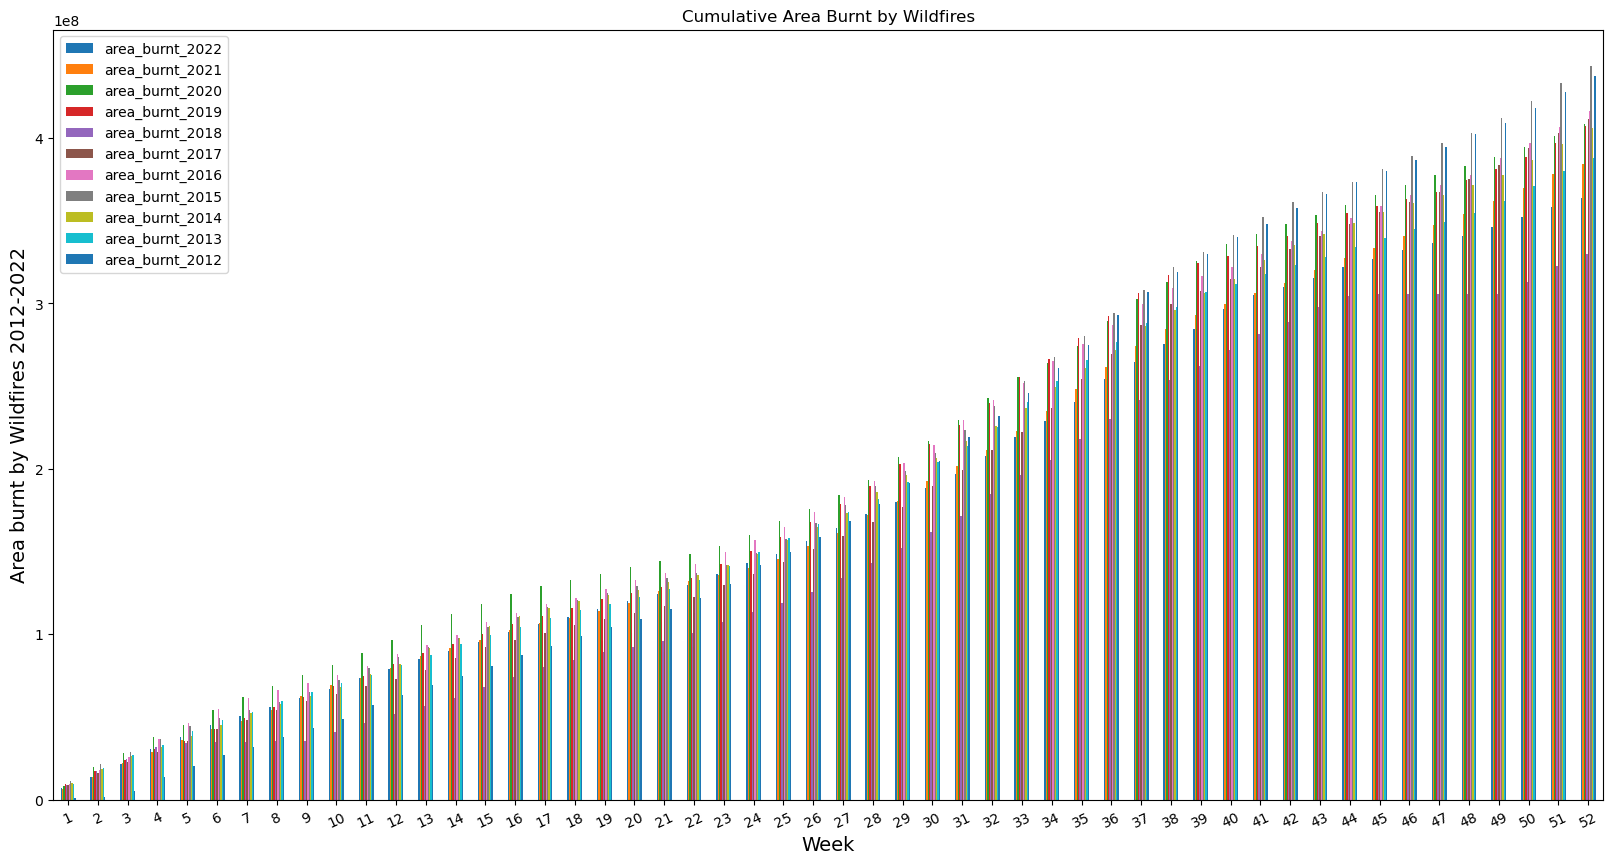

In [33]:
world_sector_bar.plot.bar(x='Week', y=['area_burnt_2022','area_burnt_2021','area_burnt_2020','area_burnt_2019',
                                      'area_burnt_2018','area_burnt_2017','area_burnt_2016','area_burnt_2015',
                                      'area_burnt_2014','area_burnt_2013','area_burnt_2012'], rot=25,legend=True,figsize=(20,10), 
                          title='Cumulative Area Burnt by Wildfires')
plt.xlabel('Week', fontsize=14) 
plt.ylabel('Area burnt by Wildfires 2012-2022', fontsize=14)
plt.savefig("C:/Users/alexi/Desktop/Project3Group3/Images/FigBar.png",bbox_inches='tight')

In [10]:
# Export area_burnt_weekly as a CSV file.
area_burnt_weekly.to_csv("C:/Users/alexi/Desktop/Project3Group3/area_burnt_weekly.csv", index=False)

## Share of the Total Land Area Burnt Yearly

In [11]:
# Create a path to CSV files, read the path and print DataFrame for the second CSV file
file_path2 = (r"C:\Users\alexi\Desktop\Project3Group3\Resources\3- share-of-the-total-land-area-burnt-by-wildfires-each-year.csv")
wildfires2 = pd.read_csv(file_path2)
wildfires2

,Entity,Code,Year,Annual share of the total land area burnt by wildfires
0,Afghanistan,AFG,2012,0.015976
1,Afghanistan,AFG,2013,0.009025
2,Afghanistan,AFG,2014,0.007864
3,Afghanistan,AFG,2015,0.006256
4,Afghanistan,AFG,2016,0.014829
...,...,...,...,...
3141,Zimbabwe,ZWE,2020,3.126520
3142,Zimbabwe,ZWE,2021,5.408635
3143,Zimbabwe,ZWE,2022,7.725561
3144,Zimbabwe,ZWE,2023,6.105052


In [12]:
# Rename the columns
wildfires2_rename = wildfires2.rename(columns={"Entity":"Country", "Annual share of the total land area burnt by wildfires":"annual_share_total_land_area_burnt"})
wildfires2_rename

,Country,Code,Year,annual_share_total_land_area_burnt
0,Afghanistan,AFG,2012,0.015976
1,Afghanistan,AFG,2013,0.009025
2,Afghanistan,AFG,2014,0.007864
3,Afghanistan,AFG,2015,0.006256
4,Afghanistan,AFG,2016,0.014829
...,...,...,...,...
3141,Zimbabwe,ZWE,2020,3.126520
3142,Zimbabwe,ZWE,2021,5.408635
3143,Zimbabwe,ZWE,2022,7.725561
3144,Zimbabwe,ZWE,2023,6.105052


In [45]:
# Remove 2023 and 2024, as we are only using data from 2012-2022
area_burnt_yearly = wildfires2_rename.drop(wildfires2[wildfires2['Year'] > 2022].index)
area_burnt_yearly

,Country,Code,Year,annual_share_total_land_area_burnt
0,Afghanistan,AFG,2012,0.015976
1,Afghanistan,AFG,2013,0.009025
2,Afghanistan,AFG,2014,0.007864
3,Afghanistan,AFG,2015,0.006256
4,Afghanistan,AFG,2016,0.014829
...,...,...,...,...
3139,Zimbabwe,ZWE,2018,6.937745
3140,Zimbabwe,ZWE,2019,7.056078
3141,Zimbabwe,ZWE,2020,3.126520
3142,Zimbabwe,ZWE,2021,5.408635


In [50]:
area_burnt_yearly2 = area_burnt_yearly.drop('Code', axis=1)
area_burnt_yearly2.set_index("Country",inplace=True)
area_burnt_yearly2

,Year,annual_share_total_land_area_burnt
Country,,
Afghanistan,2012,0.015976
Afghanistan,2013,0.009025
Afghanistan,2014,0.007864
Afghanistan,2015,0.006256
Afghanistan,2016,0.014829
...,...,...
Zimbabwe,2018,6.937745
Zimbabwe,2019,7.056078
Zimbabwe,2020,3.126520


In [51]:
africa_data = area_burnt_yearly2.loc['Africa']
africa_data.head(10)

,Year,annual_share_total_land_area_burnt
Country,,
Africa,2012,7.659314
Africa,2013,8.456222
Africa,2014,7.922038
Africa,2015,8.673921
Africa,2016,8.820186
Africa,2017,8.127977
Africa,2018,6.580430
Africa,2019,7.613947
Africa,2020,8.014693


In [14]:
# Export area_burnt_yearly as a CSV file.
area_burnt_yearly.to_csv("C:/Users/alexi/Desktop/Project3Group3/area_burnt_yearly.csv", index=False)

## Ecosystems Burnt Yearly

In [15]:
# Create a path to CSV files, read the path and print DataFrame for the third CSV file
file_path3 = (r"C:\Users\alexi\Desktop\Project3Group3\Resources\5- annual-burned-area-by-landcover.csv")
wildfires3 = pd.read_csv(file_path3)
wildfires3

,Entity,Code,Year,Yearly burned area across other land categories,Yearly burned area across croplands,Yearly burned area across forests,Yearly burned area across savannas,Yearly burned area across shrublands and grasslands
0,Afghanistan,AFG,2002,0.00000,14167.473,0.0000,0.000,18052.793
1,Afghanistan,AFG,2003,1309.41800,21680.530,0.0000,0.000,112030.360
2,Afghanistan,AFG,2004,407.85200,4357.571,0.0000,0.000,24556.953
3,Afghanistan,AFG,2005,85.86400,1395.281,0.0000,64.398,10883.193
4,Afghanistan,AFG,2006,1116.22690,9809.900,0.0000,64.398,7169.603
...,...,...,...,...,...,...,...,...
4930,Zimbabwe,ZWE,2018,837.17000,345579.000,36449.0430,420537.800,1806674.800
4931,Zimbabwe,ZWE,2019,472.24902,344205.200,28012.9590,357277.900,1784092.600
4932,Zimbabwe,ZWE,2020,1180.62290,248317.160,8006.7695,96081.230,643503.750
4933,Zimbabwe,ZWE,2021,364.92000,292214.840,2897.8940,155262.620,1353895.200


In [16]:
# Rename the columns
wildfires3_rename = wildfires3.rename(columns={"Entity":"Country","Yearly burned area across other land categories":"Other",
                                               "Yearly burned area across croplands":"Croplands","Yearly burned area across forests":"Forests",
                                               "Yearly burned area across savannas":"Savannas",
                                               "Yearly burned area across shrublands and grasslands":"Grasslands"})
wildfires3_rename

,Country,Code,Year,Other,Croplands,Forests,Savannas,Grasslands
0,Afghanistan,AFG,2002,0.00000,14167.473,0.0000,0.000,18052.793
1,Afghanistan,AFG,2003,1309.41800,21680.530,0.0000,0.000,112030.360
2,Afghanistan,AFG,2004,407.85200,4357.571,0.0000,0.000,24556.953
3,Afghanistan,AFG,2005,85.86400,1395.281,0.0000,64.398,10883.193
4,Afghanistan,AFG,2006,1116.22690,9809.900,0.0000,64.398,7169.603
...,...,...,...,...,...,...,...,...
4930,Zimbabwe,ZWE,2018,837.17000,345579.000,36449.0430,420537.800,1806674.800
4931,Zimbabwe,ZWE,2019,472.24902,344205.200,28012.9590,357277.900,1784092.600
4932,Zimbabwe,ZWE,2020,1180.62290,248317.160,8006.7695,96081.230,643503.750
4933,Zimbabwe,ZWE,2021,364.92000,292214.840,2897.8940,155262.620,1353895.200


In [17]:
# Remove 2002-2011, as we are only using data from 2012-2022
area_burnt_landcover = wildfires3_rename.drop(wildfires3_rename[wildfires3_rename['Year'] < 2012].index)
area_burnt_landcover

,Country,Code,Year,Other,Croplands,Forests,Savannas,Grasslands
10,Afghanistan,AFG,2012,0.00000,0.00000,0.0000,0.000,5.559661e+03
11,Afghanistan,AFG,2013,364.91900,837.16800,0.0000,0.000,5.946045e+03
12,Afghanistan,AFG,2014,64.39800,150.26100,0.0000,0.000,9.659640e+02
13,Afghanistan,AFG,2015,171.72700,493.71500,0.0000,0.000,1.481145e+03
14,Afghanistan,AFG,2016,407.85100,601.04504,0.0000,300.523,3.091086e+03
...,...,...,...,...,...,...,...,...
4930,Zimbabwe,ZWE,2018,837.17000,345579.00000,36449.0430,420537.800,1.806675e+06
4931,Zimbabwe,ZWE,2019,472.24902,344205.20000,28012.9590,357277.900,1.784093e+06
4932,Zimbabwe,ZWE,2020,1180.62290,248317.16000,8006.7695,96081.230,6.435038e+05
4933,Zimbabwe,ZWE,2021,364.92000,292214.84000,2897.8940,155262.620,1.353895e+06


In [18]:
# Export area_burnt_landcover as a CSV file.
area_burnt_landcover.to_csv("C:/Users/alexi/Desktop/Project3Group3/area_burnt_landcover.csv", index=False)

In [19]:
area_burnt_landcover.astype(str)

,Country,Code,Year,Other,Croplands,Forests,Savannas,Grasslands
10,Afghanistan,AFG,2012,0.0,0.0,0.0,0.0,5559.6606
11,Afghanistan,AFG,2013,364.919,837.168,0.0,0.0,5946.045
12,Afghanistan,AFG,2014,64.398,150.261,0.0,0.0,965.964
13,Afghanistan,AFG,2015,171.727,493.715,0.0,0.0,1481.145
14,Afghanistan,AFG,2016,407.851,601.04504,0.0,300.523,3091.086
...,...,...,...,...,...,...,...,...
4930,Zimbabwe,ZWE,2018,837.17,345579.0,36449.043,420537.8,1806674.8
4931,Zimbabwe,ZWE,2019,472.24902,344205.2,28012.959,357277.9,1784092.6
4932,Zimbabwe,ZWE,2020,1180.6229,248317.16,8006.7695,96081.23,643503.75
4933,Zimbabwe,ZWE,2021,364.92,292214.84,2897.894,155262.62,1353895.2


In [20]:
drop_columns = area_burnt_landcover[["Country", "Year", "Other", "Croplands", "Forests", "Savannas", "Grasslands"]].copy()
drop_columns.astype(str)
drop_columns.set_index("Country",inplace=True)
drop_columns

,Year,Other,Croplands,Forests,Savannas,Grasslands
Country,,,,,,
Afghanistan,2012,0.00000,0.00000,0.0000,0.000,5.559661e+03
Afghanistan,2013,364.91900,837.16800,0.0000,0.000,5.946045e+03
Afghanistan,2014,64.39800,150.26100,0.0000,0.000,9.659640e+02
Afghanistan,2015,171.72700,493.71500,0.0000,0.000,1.481145e+03
Afghanistan,2016,407.85100,601.04504,0.0000,300.523,3.091086e+03
...,...,...,...,...,...,...
Zimbabwe,2018,837.17000,345579.00000,36449.0430,420537.800,1.806675e+06
Zimbabwe,2019,472.24902,344205.20000,28012.9590,357277.900,1.784093e+06
Zimbabwe,2020,1180.62290,248317.16000,8006.7695,96081.230,6.435038e+05


In [21]:
world_sector = drop_columns.loc['World']
world_sector

,Year,Other,Croplands,Forests,Savannas,Grasslands
Country,,,,,,
World,2012,1309332.2,29195490.0,32420588.0,156498720.0,233160080.0
World,2013,1160595.2,25744938.0,28365170.0,145895140.0,153898700.0
World,2014,1200521.8,30557672.0,29494316.0,146904640.0,172331550.0
World,2015,1234738.4,29904144.0,32527208.0,147074670.0,173074720.0
World,2016,1084412.9,28726954.0,33213514.0,151343780.0,150360720.0
World,2017,1039398.9,30282780.0,30575574.0,137236510.0,177478430.0
World,2018,1187513.4,22586450.0,27801884.0,139537970.0,161991020.0
World,2019,1704261.2,27439538.0,34405236.0,135178750.0,145932050.0
World,2020,2831906.2,27007452.0,33229506.0,147312200.0,139635540.0


In [22]:
year_sector = world_sector[["Year", "Other", "Croplands", "Forests", "Savannas", "Grasslands"]].copy()
year_sector.astype(str)
year_sector.set_index("Year",inplace=True)
year_sector

,Other,Croplands,Forests,Savannas,Grasslands
Year,,,,,
2012,1309332.2,29195490.0,32420588.0,156498720.0,233160080.0
2013,1160595.2,25744938.0,28365170.0,145895140.0,153898700.0
2014,1200521.8,30557672.0,29494316.0,146904640.0,172331550.0
2015,1234738.4,29904144.0,32527208.0,147074670.0,173074720.0
2016,1084412.9,28726954.0,33213514.0,151343780.0,150360720.0
2017,1039398.9,30282780.0,30575574.0,137236510.0,177478430.0
2018,1187513.4,22586450.0,27801884.0,139537970.0,161991020.0
2019,1704261.2,27439538.0,34405236.0,135178750.0,145932050.0
2020,2831906.2,27007452.0,33229506.0,147312200.0,139635540.0


In [23]:
#Rename rows
year_sector_rename = year_sector.rename(index={2012:"2012",2013:"2013",2014:"2014",2015:"2015",2016:"2016",2017:"2017",
                                              2018:"2018",2019:"2019",2020:"2020",2021:"2021",2022:"2022"})
year_sector_rename

,Other,Croplands,Forests,Savannas,Grasslands
Year,,,,,
2012,1309332.2,29195490.0,32420588.0,156498720.0,233160080.0
2013,1160595.2,25744938.0,28365170.0,145895140.0,153898700.0
2014,1200521.8,30557672.0,29494316.0,146904640.0,172331550.0
2015,1234738.4,29904144.0,32527208.0,147074670.0,173074720.0
2016,1084412.9,28726954.0,33213514.0,151343780.0,150360720.0
2017,1039398.9,30282780.0,30575574.0,137236510.0,177478430.0
2018,1187513.4,22586450.0,27801884.0,139537970.0,161991020.0
2019,1704261.2,27439538.0,34405236.0,135178750.0,145932050.0
2020,2831906.2,27007452.0,33229506.0,147312200.0,139635540.0


In [24]:
year_sector_rename[:3]

,Other,Croplands,Forests,Savannas,Grasslands
Year,,,,,
2012,1309332.2,29195490.0,32420588.0,156498720.0,233160080.0
2013,1160595.2,25744938.0,28365170.0,145895140.0,153898700.0
2014,1200521.8,30557672.0,29494316.0,146904640.0,172331550.0


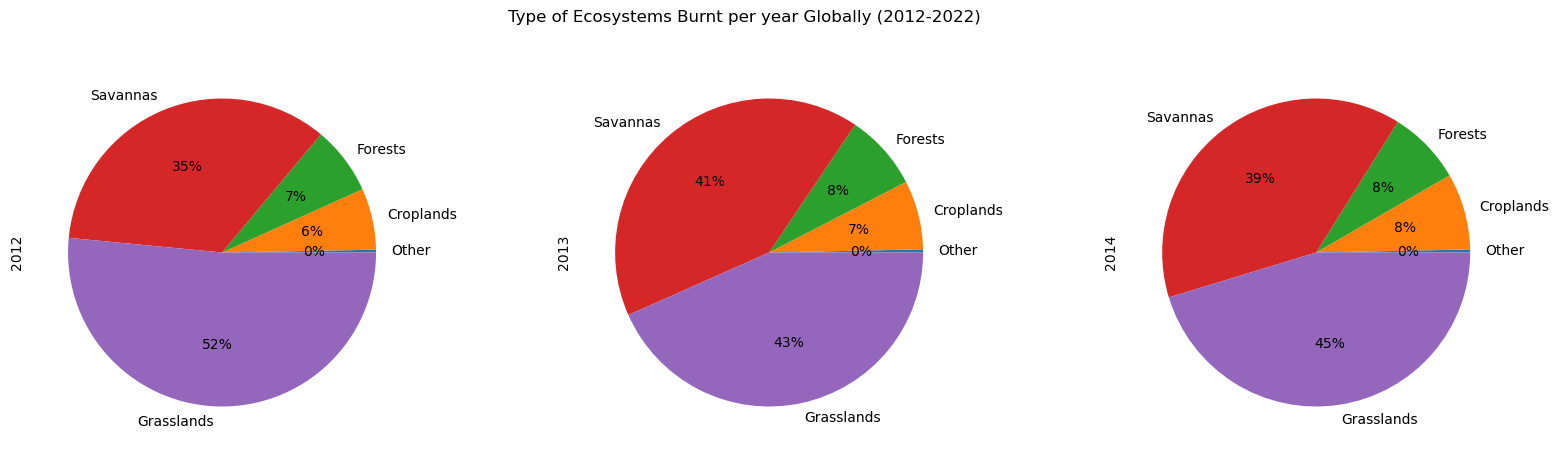

In [25]:
#Pie Chart for 2012-2014 (separated to make it easier to see)
world_pie = year_sector_rename[:3]['Other':'Grasslands']
year_sector_rename[:3].T.plot(kind='pie', legend=False, title="Type of Ecosystems Burnt per year Globally (2012-2022)", 
                              subplots=True,figsize=(20, 5),autopct='%1.0f%%')
plt.savefig("C:/Users/alexi/Desktop/Project3Group3/Images/Fig1.png",bbox_inches='tight')

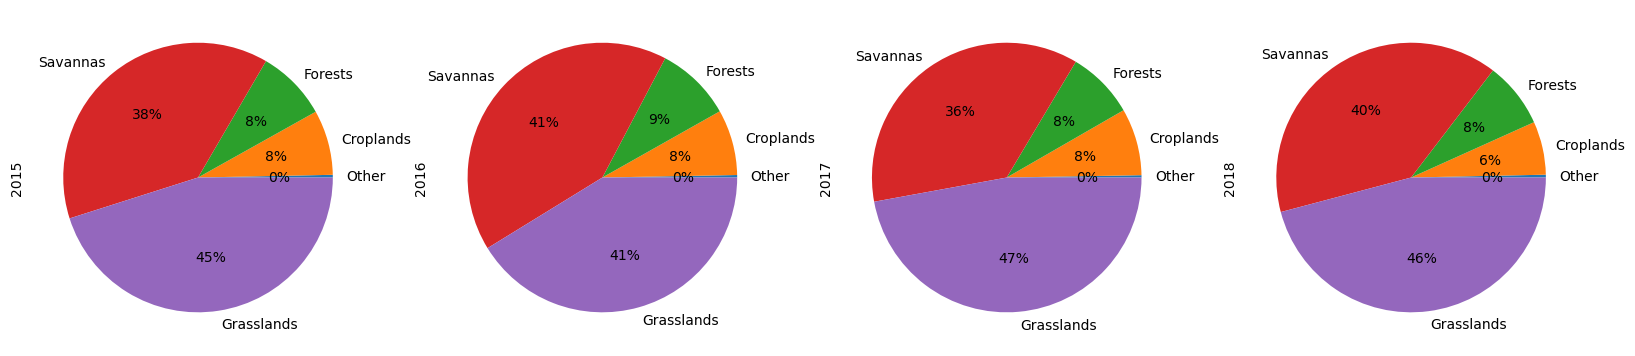

In [26]:
#Pie Chart for 2015-2018 (separated to make it easier to see)
world_pie2 = year_sector_rename[3:7]['Other':'Grasslands']
year_sector_rename[3:7].T.plot(kind='pie', legend=False, 
                              subplots=True,figsize=(20, 5),autopct='%1.0f%%')
plt.savefig("C:/Users/alexi/Desktop/Project3Group3/Images/Fig2.png",bbox_inches='tight')

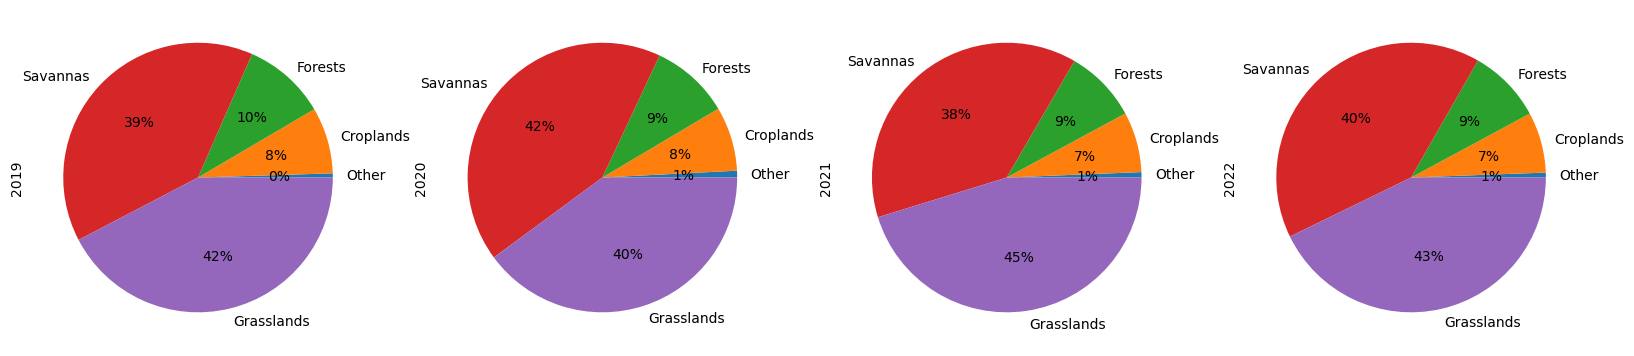

In [27]:
#Pie Chart for 2019-2022 (separated to make it easier to see)
world_pie3 = year_sector_rename[7:11]['Other':'Grasslands']
year_sector_rename[7:11].T.plot(kind='pie', legend=False, 
                              subplots=True,figsize=(20, 5),autopct='%1.0f%%')
plt.savefig("C:/Users/alexi/Desktop/Project3Group3/Images/Fig3.png",bbox_inches='tight')

In [28]:

data = pd.read_csv('/Users/alexi/Desktop/Project3Group3/area_burnt_weekly.csv')
geolocator = Nominatim(user_agent="wildfire_map")

# Function to update the map based on dropdown selection
def update_map(country, week, year):
    # Filter data based on selected country, week, and year
    filtered_data = data[(data['Country'] == country) & (data['Week'] == week)]

    # Geocode the selected country to get its coordinates
    location = geolocator.geocode(country)
    if location:
        country_center = [location.latitude, location.longitude]
    else:
        country_center = [0, 0]  # Default to center of the map

    # Initialize a Folium map centered on the selected country
    my_map = folium.Map(location=country_center, zoom_start=4)

    # Add Markers for the selected country, week, and year
    for index, row in filtered_data.iterrows():
        popup_text = f"<b>{country}</b><br>"
        popup_text += f"Week: {week}<br>"
        popup_text += f"Wildfire area {year} Hectares: {row[f'Cumulative area burnt by wildfires in {year}']}<br>"
        folium.Marker(location=country_center, popup=popup_text).add_to(my_map)

    # Display the map
    display(my_map)

# Get unique country names and weeks
country_names = data['Country'].unique().tolist()
weeks = data['Week'].unique().tolist()
years = [int(col.split()[-1]) for col in data.columns if col.startswith('Cumulative area burnt by wildfires')]

# Create dropdown widgets
country_dropdown = Dropdown(options=country_names, description='Country:')
week_dropdown = Dropdown(options=weeks, description='Week:')
year_dropdown = Dropdown(options=years, description='Year:')

# Display interactive dropdowns
interact(update_map, country=country_dropdown, week=week_dropdown, year=year_dropdown);

interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'Africa', 'Akrotiri and Dhekeli…